In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
stocks_data = pd.read_csv('/content/portfolio_data.csv')

In [3]:
stocks_data.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [4]:
stocks_data.shape

(1520, 5)

Add three columns with month,day,year

In [5]:
stocks_data[["Month", "Day", "Year"]] = stocks_data['Date'].str.split(pat="/", expand=True)

In [6]:
stocks_data.head()

,Date,AMZN,DPZ,BTC,NFLX,Month,Day,Year
0,5/1/2013,248.229996,51.190983,106.250000,30.415714,5,1,2013
1,5/2/2013,252.550003,51.987320,98.099998,30.641428,5,2,2013
2,5/3/2013,258.049988,52.446388,112.900002,30.492857,5,3,2013
3,5/6/2013,255.720001,53.205257,109.599998,30.098572,5,6,2013
4,5/7/2013,257.730011,54.151505,113.199997,29.464285,5,7,2013


In [7]:
stocks_data['Year'].unique()

array(['2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype=object)

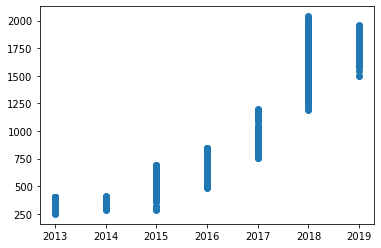

In [8]:
plt.scatter(stocks_data['Year'], stocks_data['AMZN'])
plt.show()

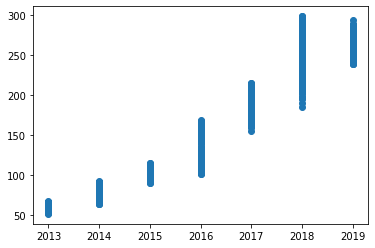

In [9]:
plt.scatter(stocks_data['Year'], stocks_data['DPZ'])
plt.show()

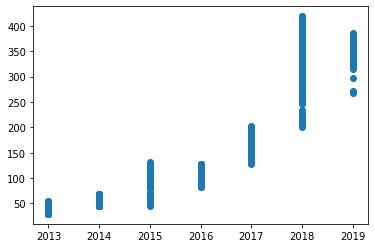

In [10]:
plt.scatter(stocks_data['Year'], stocks_data['NFLX'])
plt.show()

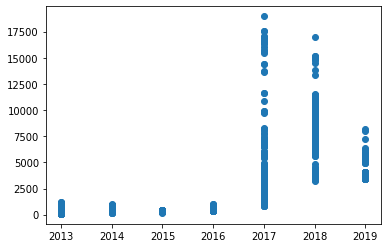

In [11]:
plt.scatter(stocks_data['Year'], stocks_data['BTC'])
plt.show()

In [12]:
company_names = {'Amazon' : 'AMZN','Netflix' : 'NFLX','BTC':'BTC','DPZ':'DPZ'}

Convert date to number for linear regression

In [13]:
import datetime as dt
stocks_data['convertedDate'] = pd.to_datetime(stocks_data['Date'])
stocks_data['convertedDate']=stocks_data['convertedDate'].map(dt.datetime.toordinal)

In [14]:
stocks_data.head()

,Date,AMZN,DPZ,BTC,NFLX,Month,Day,Year,convertedDate
0,5/1/2013,248.229996,51.190983,106.250000,30.415714,5,1,2013,734989
1,5/2/2013,252.550003,51.987320,98.099998,30.641428,5,2,2013,734990
2,5/3/2013,258.049988,52.446388,112.900002,30.492857,5,3,2013,734991
3,5/6/2013,255.720001,53.205257,109.599998,30.098572,5,6,2013,734994
4,5/7/2013,257.730011,54.151505,113.199997,29.464285,5,7,2013,734995


For Amazon

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [16]:
def prepareData(timeseries,window):
  X = []
  y = []
  for i in range(len(timeseries)):
    endpt = i + window
    if endpt > len(timeseries)-1:
      break
    feature_X = timeseries[i:endpt]
    res_y = timeseries[endpt]
    X.append(feature_X)
    y.append(res_y)
  return np.array(X), np.array(y)

In [17]:
# define input sequence
X_train = stocks_data['AMZN'][:1000,]
X_test = stocks_data['AMZN'][1000:,] #last 520 records for test
timeseries_data = X_train
# choose a number of time steps
n_steps = 1
# split into samples
X, y = prepareData(timeseries_data, n_steps)

In [18]:
X_train.shape

(1000,)

In [19]:
X_test

1000     902.059998
1001     898.530029
1002     907.409973
1003     907.619995
1004     909.289978
           ...     
1515    1917.770020
1516    1899.869995
1517    1889.979980
1518    1822.680054
1519    1840.119995
Name: AMZN, Length: 520, dtype: float64

In [20]:
y

array([252.550003, 258.049988, 255.720001, 257.730011, 258.679993,
       260.160004, 263.630005, 264.51001 , 268.329987, 266.559998,
       264.119995, 269.899994, 267.630005, 268.859985, 262.959991,
       261.799988, 261.73999 , 267.290009, 265.529999, 266.829987,
       269.200012, 266.880005, 265.700012, 267.170013, 267.829987,
       276.869995, 281.070007, 274.779999, 271.670013, 275.790009,
       273.98999 , 278.059998, 281.76001 , 278.160004, 273.440002,
       273.359985, 270.609985, 272.089996, 277.570007, 277.549988,
       277.690002, 282.100006, 283.730011, 284.029999, 285.880005,
       290.589996, 291.529999, 292.329987, 299.660004, 307.549988,
       306.570007, 306.869995, 308.690002, 304.109985, 305.230011,
       303.480011, 301.059998, 298.940002, 303.399994, 312.01001 ,
       306.100006, 302.410004, 301.220001, 305.570007, 304.209991,
       300.98999 , 300.75    , 296.910004, 295.73999 , 297.26001 ,
       296.690002, 293.970001, 291.339996, 286.470001, 284.820

In [21]:
X.shape

(999, 1)

In [22]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [23]:
X.shape

(999, 1, 1)

LSTM Model

In [24]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 2s 3ms/step - loss: 264829.6250
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 151151.7344
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 18630.6562
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 305.0506
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 85.1778
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 82.0989
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 81.9241
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 82.4614
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 82.6410
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 82.2657
Epoch 11/200
32/32 [==============================] - 0s 3ms/step - loss: 81.9478
Epoch 12/200
32/32 [==============================] - 0s 3ms/step - loss: 82.2326
Epoch 13/200


In [25]:
from keras.models import load_model

model.save('acc_model.h5')  # creates a HDF5 file 'my_model.h5

In [27]:
# demonstrate prediction for next 10 days
x_input = np.array(X_test)
x_input=x_input.reshape((len(x_input), 1, 1))

#yhat = model.predict(x_input)

In [28]:
#prediction
yhat = model.predict(x_input) # predict test data
yhat.shape

valid = pd.DataFrame({'actual': stocks_data['AMZN'][1000:,]})
valid['predictions'] = yhat

In [29]:
#prediction
yhat = model.predict(x_input) # predict test data

#compare true and predicted values

In [30]:
yhat

array([[ 902.02   ],
       [ 898.4938 ],
       [ 907.3646 ],
       [ 907.5744 ],
       [ 909.2427 ],
       [ 918.32336],
       [ 924.9265 ],
       [ 948.1426 ],
       [ 946.8539 ],
       [ 940.95   ],
       [ 937.4536 ],
       [ 934.077  ],
       [ 948.95166],
       [ 952.7278 ],
       [ 948.8618 ],
       [ 947.5331 ],
       [ 961.24896],
       [ 957.87244],
       [ 965.9642 ],
       [ 944.67615],
       [ 958.39197],
       [ 959.74054],
       [ 970.55945],
       [ 971.4285 ],
       [ 980.2295 ],
       [ 993.24603],
       [ 995.64355],
       [ 996.56256],
       [ 994.48474],
       [ 995.81335],
       [1006.5822 ],
       [1011.18744],
       [1002.8561 ],
       [1009.9188 ],
       [1010.11865],
       [ 978.1915 ],
       [ 964.8053 ],
       [ 980.66895],
       [ 976.35333],
       [ 964.06604],
       [ 987.5819 ],
       [ 995.0341 ],
       [ 992.4569 ],
       [1002.08685],
       [1001.1578 ],
       [1003.5953 ],
       [ 993.84534],
       [ 976.

In [31]:
valid

,actual,predictions
1000,902.059998,902.020020
1001,898.530029,898.493774
1002,907.409973,907.364624
1003,907.619995,907.574402
1004,909.289978,909.242676
...,...,...
1515,1917.770020,1916.682983
1516,1899.869995,1898.801392
1517,1889.979980,1888.921631
1518,1822.680054,1821.691040


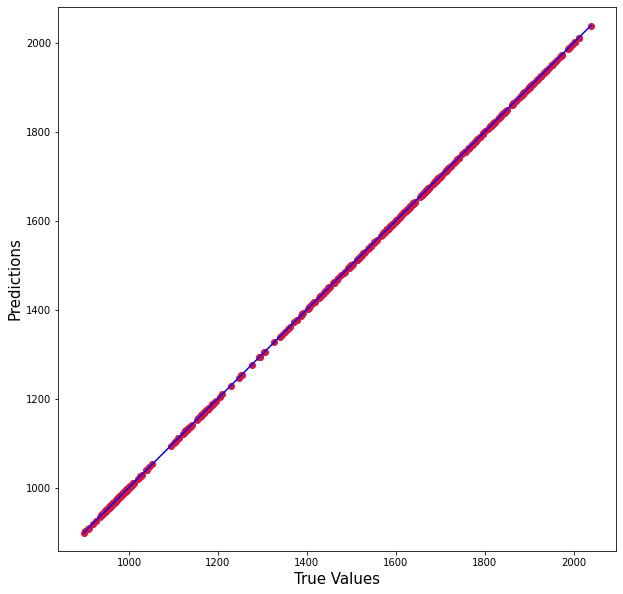

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(valid['actual'], valid['predictions'], c='crimson')


p1 = max(max(valid['predictions']), max(valid['actual']))
p2 = min(min(valid['predictions']), min(valid['actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [48]:
# Predicting for a month
x_input = [1839]
temp_input=list(x_input)
lst_output=[]
i=0
while(i<90):
    
    if(len(temp_input)>0):
        x_input=np.array(temp_input[0:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, 1, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

0 day input [1839]
0 day output [[1837.994]]
1 day input [1837.994]
1 day output [[1836.9893]]
2 day input [1836.9893]
2 day output [[1835.9856]]
3 day input [1835.9856]
3 day output [[1834.983]]
4 day input [1834.983]
4 day output [[1833.9812]]
5 day input [1833.9812]
5 day output [[1832.9807]]
6 day input [1832.9807]
6 day output [[1831.9811]]
7 day input [1831.9811]
7 day output [[1830.9825]]
8 day input [1830.9825]
8 day output [[1829.985]]
9 day input [1829.985]
9 day output [[1828.9884]]
10 day input [1828.9884]
10 day output [[1827.993]]
11 day input [1827.993]
11 day output [[1826.9985]]
12 day input [1826.9985]
12 day output [[1826.0051]]
13 day input [1826.0051]
13 day output [[1825.0126]]
14 day input [1825.0126]
14 day output [[1824.0211]]
15 day input [1824.0211]
15 day output [[1823.0308]]
16 day input [1823.0308]
16 day output [[1822.0414]]
17 day input [1822.0414]
17 day output [[1821.0531]]
18 day input [1821.0531]
18 day output [[1820.0659]]
19 day input [1820.0659]
1

In [49]:
lst_output

[1837.994,
 1836.9893,
 1835.9856,
 1834.983,
 1833.9812,
 1832.9807,
 1831.9811,
 1830.9825,
 1829.985,
 1828.9884,
 1827.993,
 1826.9985,
 1826.0051,
 1825.0126,
 1824.0211,
 1823.0308,
 1822.0414,
 1821.0531,
 1820.0659,
 1819.0796,
 1818.0945,
 1817.11,
 1816.1267,
 1815.1444,
 1814.1631,
 1813.1831,
 1812.2037,
 1811.2257,
 1810.2487,
 1809.2723,
 1808.297,
 1807.3229,
 1806.3496,
 1805.3774,
 1804.4061,
 1803.4359,
 1802.4668,
 1801.4987,
 1800.5314,
 1799.5653,
 1798.6001,
 1797.6359,
 1796.6725,
 1795.7103,
 1794.749,
 1793.7888,
 1792.8296,
 1791.8712,
 1790.914,
 1789.9578,
 1789.0023,
 1788.0481,
 1787.0946,
 1786.1422,
 1785.191,
 1784.2408,
 1783.2914,
 1782.3429,
 1781.3955,
 1780.4489,
 1779.5033,
 1778.5588,
 1777.6155,
 1776.6729,
 1775.7311,
 1774.7904,
 1773.8505,
 1772.9115,
 1771.9738,
 1771.0369,
 1770.1012,
 1769.1661,
 1768.2324,
 1767.2994,
 1766.3674,
 1765.4364,
 1764.5065,
 1763.5774,
 1762.6493,
 1761.7222,
 1760.796,
 1759.8707,
 1758.9463,
 1758.0231,
 17

In [50]:
len(lst_output)

90

In [53]:
stock_future_values = {'stock_future' : lst_output}

In [54]:
df = pd.DataFrame(stock_future_values) 
    
# saving the dataframe 
df.to_csv('stock_future_values.csv') 